In [2]:
# pip install pandas_datareader


In [3]:
import random
from random import choices
from random import randint
import math
import pandas_datareader as datareader
import pandas as pds
import matplotlib.pyplot as plot
import numpy as np
from numpy import array
from sklearn.preprocessing import MinMaxScaler
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
import tensorflow as tf
import time
from sklearn.metrics import mean_squared_error

D:\DataScience\Anaconda\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


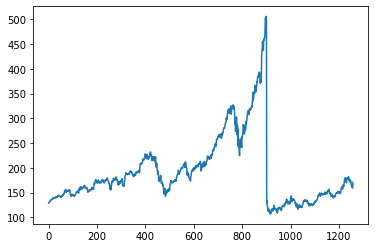

In [4]:
database = datareader.get_data_tiingo('AAPL', api_key='7938af734e4e99dd4b7a8321cdb47fb699d2f9dc')
database.to_csv('AAPL.csv')
database = pds.read_csv('AAPL.csv')
plot.plot(database.reset_index()['close'])

actual = database[1000:1030]
actual = actual.reset_index()['close']

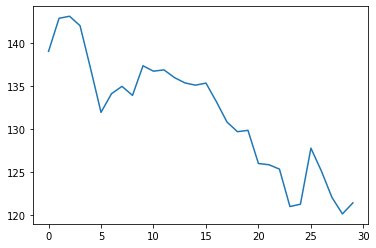

In [5]:
plot.plot(actual)

In [6]:
database = database[0:1000]
database1 = database.reset_index()['close']

In [7]:
database

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-02-01 00:00:00+00:00,128.75,130.4900,127.010,127.030,111985040,30.293870,30.703279,29.884462,29.889168,447940160,0.0,1.0
1,AAPL,2017-02-02 00:00:00+00:00,128.53,129.3900,127.780,127.975,33710411,30.242106,30.444457,30.065637,30.111519,134841644,0.0,1.0
2,AAPL,2017-02-03 00:00:00+00:00,129.08,129.1900,128.160,128.310,24507301,30.371517,30.397399,30.155048,30.190342,98029204,0.0,1.0
3,AAPL,2017-02-06 00:00:00+00:00,130.29,130.5000,128.900,129.130,26845924,30.656220,30.705632,30.329164,30.383281,107383696,0.0,1.0
4,AAPL,2017-02-07 00:00:00+00:00,131.53,132.0900,130.450,130.540,38183841,30.947983,31.079746,30.693867,30.715043,152735364,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,AAPL,2021-01-14 00:00:00+00:00,128.91,131.0000,128.760,130.800,90221755,128.120472,130.197671,127.971390,129.998896,90221755,0.0,1.0
996,AAPL,2021-01-15 00:00:00+00:00,127.14,130.2242,127.000,128.780,111598531,126.361312,129.426623,126.222170,127.991268,111598531,0.0,1.0
997,AAPL,2021-01-19 00:00:00+00:00,127.83,128.7100,126.938,127.780,90757329,127.047086,127.921697,126.160549,126.997392,90757329,0.0,1.0
998,AAPL,2021-01-20 00:00:00+00:00,132.03,132.4900,128.550,128.660,104319489,131.221363,131.678545,127.762676,127.872003,104319489,0.0,1.0


In [8]:
database1.shape

(1000,)

In [9]:
database1

0      128.75
1      128.53
2      129.08
3      130.29
4      131.53
        ...  
995    128.91
996    127.14
997    127.83
998    132.03
999    136.87
Name: close, Length: 1000, dtype: float64

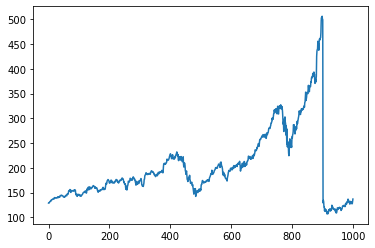

In [10]:
plot.plot(database1)

In [11]:
scale = MinMaxScaler(feature_range=(0,1))
database1 = scale.fit_transform(np.array(database1).reshape(-1,1))
database1

array([[5.48778961e-02],
       [5.43268629e-02],
       [5.57044458e-02],
       [5.87351284e-02],
       [6.18409518e-02],
       [6.31183469e-02],
       [6.40701315e-02],
       [6.33187226e-02],
       [6.62492173e-02],
       [7.05823419e-02],
       [7.18096431e-02],
       [7.13963682e-02],
       [7.23356293e-02],
       [7.47902317e-02],
       [7.58171572e-02],
       [7.43644333e-02],
       [7.46900438e-02],
       [7.53663118e-02],
       [7.55165936e-02],
       [8.25297433e-02],
       [8.04508453e-02],
       [8.25046963e-02],
       [8.14026299e-02],
       [8.18534753e-02],
       [8.05510332e-02],
       [7.97495304e-02],
       [8.09016907e-02],
       [8.10519724e-02],
       [8.05259862e-02],
       [8.42078898e-02],
       [8.47839699e-02],
       [8.30306825e-02],
       [8.67125861e-02],
       [8.26549781e-02],
       [8.66123982e-02],
       [8.53600501e-02],
       [8.46587351e-02],
       [8.52598622e-02],
       [9.25735755e-02],
       [9.33750783e-02],


In [12]:
database1.shape

(1000, 1)

In [13]:
trainSize = int(len(database1)*0.65)
testSize = len(database1) - trainSize
trainingData, validData = database1[0:trainSize,:], database1[trainSize:len(database1),:1]

In [14]:
len(trainingData), len(validData)

(650, 350)

In [15]:
trainingData

array([[0.0548779 ],
       [0.05432686],
       [0.05570445],
       [0.05873513],
       [0.06184095],
       [0.06311835],
       [0.06407013],
       [0.06331872],
       [0.06624922],
       [0.07058234],
       [0.07180964],
       [0.07139637],
       [0.07233563],
       [0.07479023],
       [0.07581716],
       [0.07436443],
       [0.07469004],
       [0.07536631],
       [0.07551659],
       [0.08252974],
       [0.08045085],
       [0.0825047 ],
       [0.08140263],
       [0.08185348],
       [0.08055103],
       [0.07974953],
       [0.08090169],
       [0.08105197],
       [0.08052599],
       [0.08420789],
       [0.08478397],
       [0.08303068],
       [0.08671259],
       [0.08265498],
       [0.0866124 ],
       [0.08536005],
       [0.08465874],
       [0.08525986],
       [0.09257358],
       [0.09337508],
       [0.09289919],
       [0.09222292],
       [0.09232311],
       [0.09500313],
       [0.09312461],
       [0.09222292],
       [0.09142142],
       [0.090

In [16]:
def createDataset(_database, timeStep=1):
	X_data, Y_data = [], []
	for i in range(len(_database)-timeStep-1):
		point = _database[i:(i+timeStep), 0]    
		X_data.append(point)
		Y_data.append(_database[i + timeStep, 0])
	return numpy.array(X_data), numpy.array(Y_data)

GA functions

In [17]:
def fitness(model):
  timeStep = model.layers[1].output.shape[1]
  #timeStep = 30
  xInput=validData[len(validData)-timeStep:].reshape(1,-1)

  tempInput=list(xInput)
  tempInput=tempInput[0].tolist()
  listOutput=[]
  steps=timeStep
  i=0
  while(i<30):
    if(len(tempInput)>timeStep):
      #print(tempInput)
      xInput=np.array(tempInput[1:])

      xInput=xInput.reshape(1,-1)
      xInput = xInput.reshape((1, steps, 1))
      #print(xInput)
      Y_hat = model.predict(xInput, verbose=0)

      tempInput.extend(Y_hat[0].tolist())
      tempInput=tempInput[1:]
      #print(tempInput)
      listOutput.extend(Y_hat.tolist())
      i=i+1
    else:
      xInput = xInput.reshape((1, steps,1))
      Y_hat = model.predict(xInput, verbose=0)
      #print(Y_hat[0])
      tempInput.extend(Y_hat[0].tolist())
      print(len(tempInput))
      listOutput.extend(Y_hat.tolist())
      i=i+1

  val = math.sqrt(mean_squared_error(scale.inverse_transform(listOutput),actual))
 
  return val

def generate_population(size: int, LSTM_sells_lower_bound: float, LSTM_sells_upper_bound: float, 
                                   window_size_lower_bound: float, window_size__upper_bound: float):
  pop = []
  
  i = 0
  while i<size:
    lstm = round(random.uniform(LSTM_sells_lower_bound, LSTM_sells_upper_bound))
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(round(random.uniform(window_size_lower_bound, window_size__upper_bound)),1)))     #(100,1) == X_train.shape - window
    model.add(LSTM(lstm,return_sequences=True))
    model.add(LSTM(lstm))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    pop.append(model)
    i +=1

  return pop

def rank_population(population):
  ranked_pop = []

  for p in population:
    _f = fitness(p)
    ranked_pop.append((_f, p))
  
  #ranked_pop.sort()
  #ranked_pop.reverse()

  return ranked_pop

def select_pair(ranked_population):
  pair = []

  while True:
    pair.append(random.choices(ranked_population[0:round(len(ranked_population))], weights = (25, 20, 15, 15, 10, 7, 5, 3)))     #20, 15, 10, 10, 10, 7, 7, 6, 6, 5, 3, 1
    pair.append(random.choices(ranked_population[0:round(len(ranked_population))], weights = (25, 20, 15, 15, 10, 7, 5, 3)))      #25, 20, 15, 15, 10, 7, 5, 3

    if pair[0][0] != pair[1][0]:
      break

    pair.clear()

  return pair

def genbin(n):
    i=0
    gen_bit = []
    while i < n:
      bit = str(randint(0,1))
      gen_bit.append(bit)
      i +=1
    gen_bit = ''.join(gen_bit)
    return gen_bit

def cross_over(pair):
  window_1 = str(bin(pair[0][0][1].layers[1].output.shape[1]))
  lstm_1 = str(bin(pair[0][0][1].layers[1].output.shape[2]))    

  window_2 = str(bin(pair[1][0][1].layers[1].output.shape[1]))
  lstm_2 = str(bin(pair[1][0][1].layers[1].output.shape[2]))

  window_1 = window_1[2:]
  lstm_1 = lstm_1[2:]

  window_2 = window_2[2:]
  lstm_2 = lstm_2[2:]

  if len(window_1) != len(window_2):
    diff = abs(len(window_1) - len(window_2))
    i=0
    if len(window_1) < len(window_2):
     while len(window_1) < len(window_2):
       window_1 = '0' + window_1
       i += 1
  if  len(window_2) < len(window_1):
    while len(window_2) < len(window_1):
      window_2 = '0' + window_2
      i += 1

  if len(lstm_1) != len(lstm_2):
    diff = abs(len(lstm_1) - len(lstm_2))
    i=0
    if len(lstm_1) < len(lstm_2):
     while len(lstm_1) < len(lstm_2):
       lstm_1 = '0' + lstm_1
       i += 1
  if  len(lstm_2) < len(lstm_1):
    while len(lstm_2) < len(lstm_1):
      lstm_2 = '0' + lstm_2
      i += 1

  window_p = random.randint(1,len(window_1)-1)
  lstm_p = random.randint(1,len(lstm_1)-1)

  print("window_p: ", window_p, "    lstm_p: ", lstm_p)

  window_child_1 = window_1[:window_p] + window_2[window_p:]
  window_child_2 = window_2[:window_p] + window_1[window_p:]

  lstm_child_1 = lstm_1[:lstm_p] + lstm_2[lstm_p:]
  lstm_child_2 = lstm_2[:lstm_p] + lstm_1[lstm_p:]

  while int(window_child_1, 2) == 0 or int(window_child_2, 2) == 0 or int(lstm_child_1, 2) == 0 or int(lstm_child_2, 2) == 0:
    if int(window_child_1, 2) == 0:
      length = randint(2, 8)
      window_child_1 = genbin(length)

    if int(window_child_2, 2) == 0:
      length = randint(2, 8)
      window_child_2 = genbin(length)

    if int(lstm_child_1, 2) == 0:
      length = randint(2, 8)
      lstm_child_1 = genbin(length)

    if int(lstm_child_2, 2) == 0:
      length = randint(2, 8)
      lstm_child_2 = genbin(length)

  pair = []
  
  model1=Sequential()
  model1.add(LSTM(50,return_sequences=True,input_shape=(int(window_child_1, 2),1)))     
  model1.add(LSTM(int(lstm_child_1, 2), return_sequences=True))
  model1.add(LSTM(int(lstm_child_1, 2)))
  model1.add(Dense(1))
  model1.compile(loss='mean_squared_error',optimizer='adam')
  pair.append(model1)

  model2=Sequential()
  model2.add(LSTM(50,return_sequences=True,input_shape=(int(window_child_2, 2),1)))     
  model2.add(LSTM(int(lstm_child_2, 2), return_sequences=True))
  model2.add(LSTM(int(lstm_child_2, 2)))
  model2.add(Dense(1))
  model2.compile(loss='mean_squared_error',optimizer='adam')
  pair.append(model2)

  print("1: ", window_1, "  ", lstm_1)
  print("2: ", window_2, "  ", lstm_2)
  print("child_1: ", window_child_1, "  ", lstm_child_1)
  print("child_2: ", window_child_2, "  ", lstm_child_2)

  return pair

def mutation(new_population):
  percent_of_population = random.uniform(0, 0.8)
  num_of_population = round(percent_of_population * len(new_population))
  
  i = 0
  while i < num_of_population:
    mutated_one = random.choice(new_population)
    
    window = str(bin(mutated_one.layers[1].output.shape[1]))
    lstm = str(bin(mutated_one.layers[1].output.shape[2]))
    print('window: ', window, "   lstm: ", lstm)
    window = window[2:]
    lstm = lstm[2:]
    
    new_population.remove(mutated_one)

    mutation_num = randint(1, 3)
    j=0

    while j < mutation_num:
      mutated_gene = randint(0, 1)
      
      if mutated_gene == 0:
        mutated_chromosome = randint(0, len(window)-1)
        window = list(window)
        window[mutated_chromosome] = str(int(window[mutated_chromosome]) ^ 1)
        window = ''.join(window)
        if int(window, 2) == 0:
          window = str(bin(mutated_one.layers[1].output.shape[1]))
          window = window[2:]


      else:
        mutated_chromosome = randint(0, len(lstm)-1)
        lstm = list(lstm)
        lstm[mutated_chromosome] = str(int(lstm[mutated_chromosome]) ^ 1)
        lstm = ''.join(lstm)
        if int(lstm, 2) == 0:
          lstm = str(bin(mutated_one.layers[1].output.shape[2]))
          lstm = lstm[2:]

      j += 1
    
    print('mut_window: ', window, "   mut_lstm: ", lstm)
    
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(int(window, 2),1)))     
    model.add(LSTM(int(lstm, 2), return_sequences=True))
    model.add(LSTM(int(lstm, 2)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
      
    new_population.append(model)
    i += 1

  return new_population


Full Genetic Algorithm

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

start = time.time()

pop = generate_population(8, 10, 50, 10, 50)

for model in pop:
  XTraining, YTraining = createDataset(trainingData, model.input_shape[1])
  XValid, YValid = createDataset(validData, model.input_shape[1])
  XTraining =XTraining.reshape(XTraining.shape[0],XTraining.shape[1] , 1)
  XValid = XValid.reshape(XValid.shape[0],XValid.shape[1] , 1)

  model.fit(XTraining,YTraining,validation_data=(XValid,YValid),epochs=20,batch_size=64,verbose=1)
  print("val_loss: ", model.history.history['val_loss'][len(model.history.history['val_loss'])-1])

ranked_pop = rank_population(pop)
ranked_pop.sort()

min_val_loss = []
min_val_loss.append(ranked_pop[0][0])

N = 30
i = 2

while i < N:
    
  print("RANKED_POP")
  for p in ranked_pop:
    print(p[0], "    window: ", p[1].layers[1].output.shape[1], "    lstm_cells: ", p[1].layers[1].output.shape[2])    #"    vall_loss: ", p[1].history.history['val_loss'][len(model.history.history['val_loss'])-1]

  min_val_loss.append(ranked_pop[0][0])

  pair = []
  children = []
  k = 0

  while  k < round(len(pop)/2):
    pair = select_pair(ranked_pop)
    children += cross_over(pair)
    k += 2

  print("CHILDREN")
  for p in children:
    print("window: ", p.layers[1].output.shape[1], "    lstm_cells: ", p.layers[1].output.shape[2])
    
  mutated_pop = mutation(children)
  print("MUTATED")
  for p in mutated_pop:
    print("window: ", p.layers[1].output.shape[1], "    lstm_cells: ", p.layers[1].output.shape[2])

  #new_pop = []
  ranked_pop = ranked_pop[0:round(len(ranked_pop)/2)]

  #for model in ranked_pop[0:round(len(ranked_pop)/2)]:
    #new_pop.append(model[1])

  for model in mutated_pop:
    XTraining, YTraining = createDataset(trainingData, model.input_shape[1])
    XValid, YValid = createDataset(validData, model.input_shape[1])
    XTraining =XTraining.reshape(XTraining.shape[0],XTraining.shape[1] , 1)
    XValid = XValid.reshape(XValid.shape[0],XValid.shape[1] , 1)

    model.fit(XTraining,YTraining,validation_data=(XValid,YValid),epochs=20,batch_size=64,verbose=1)
    print("val_loss: ", model.history.history['val_loss'][len(model.history.history['val_loss'])-1])

  ranked_mutated_pop = rank_population(mutated_pop)    
  
  ranked_pop = ranked_pop + ranked_mutated_pop
  ranked_pop.sort()

  #pop.clear()
  #for p in ranked_pop:
    #pop.append(p)
  #print("************************************************************************")
  #print("NEW POP")
  #for p in pop:
    #print("    window: ", p.layers[1].output.shape[1], "    lstm_cells: ", p.layers[1].output.shape[2])     #"    vall_loss: ", p.history.history['val_loss'][len(p.history.history['val_loss'])-1],

  print("~~~~~~~~~ GENERATION ", i, " COMPLETED ~~~~~~~~~~")

  i += 1

end = time.time()
print("TOTAL TIME SPENT: ", end - start)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
Epoch 1/20
 1/10 [==>...........................] - ETA: 1s - loss: 0.0379

D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 2s 155ms/step - loss: 0.0142 - val_loss: 0.0332
Epoch 2/20
10/10 [==============================] - 2s 166ms/step - loss: 0.0029 - val_loss: 0.0673
Epoch 3/20
10/10 [==============================] - 1s 152ms/step - loss: 0.0018 - val_loss: 0.0367
Epoch 4/20
10/10 [==============================] - 1s 152ms/step - loss: 0.0014 - val_loss: 0.0423
Epoch 5/20
10/10 [==============================] - 1s 149ms/step - loss: 0.0011 - val_loss: 0.0260
Epoch 6/20
10/10 [==============================] - 2s 159ms/step - loss: 6.9045e-04 - val_loss: 0.0227
Epoch 7/20
10/10 [==============================] - 1s 149ms/step - loss: 4.6279e-04 - val_loss: 0.0214
Epoch 8/20
10/10 [==============================] - 1s 141ms/step - loss: 4.4133e-04 - val_loss: 0.0221
Epoch 9/20
10/10 [==============================] - 2s 168ms/step - loss: 4.2871e-04 - val_loss: 0.0217
Epoch 10/20
10/10 [==============================] - 1s 151ms/step - loss: 4.3462e-04 - val_los

10/10 [==============================] - 2s 178ms/step - loss: 3.2422e-04 - val_loss: 0.0180
Epoch 20/20
10/10 [==============================] - 1s 137ms/step - loss: 3.2401e-04 - val_loss: 0.0183
val_loss:  0.01827184669673443
Epoch 1/20
10/10 [==============================] - 3s 283ms/step - loss: 0.0083 - val_loss: 0.0430
Epoch 2/20
10/10 [==============================] - 3s 257ms/step - loss: 0.0020 - val_loss: 0.0362
Epoch 3/20
10/10 [==============================] - 2s 248ms/step - loss: 0.0011 - val_loss: 0.0367
Epoch 4/20
10/10 [==============================] - 3s 278ms/step - loss: 8.1966e-04 - val_loss: 0.0282
Epoch 5/20
10/10 [==============================] - 3s 286ms/step - loss: 6.3833e-04 - val_loss: 0.0255
Epoch 6/20
10/10 [==============================] - 3s 284ms/step - loss: 5.1734e-04 - val_loss: 0.0229
Epoch 7/20
10/10 [==============================] - 3s 261ms/step - loss: 4.7351e-04 - val_loss: 0.0225
Epoch 8/20
10/10 [==============================] - 2s 

Epoch 17/20
10/10 [==============================] - 2s 226ms/step - loss: 3.4347e-04 - val_loss: 0.0206
Epoch 18/20
10/10 [==============================] - 2s 228ms/step - loss: 3.4496e-04 - val_loss: 0.0210
Epoch 19/20
10/10 [==============================] - 2s 221ms/step - loss: 3.3851e-04 - val_loss: 0.0206
Epoch 20/20
10/10 [==============================] - 2s 230ms/step - loss: 3.2996e-04 - val_loss: 0.0205
val_loss:  0.02051897719502449
21


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


48


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


33


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


43


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


44


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


38
RANKED_POP
12.337058048161586     window:  43     lstm_cells:  36
13.361070348886178     window:  20     lstm_cells:  39
14.091696605939033     window:  42     lstm_cells:  48
15.031461690733197     window:  37     lstm_cells:  14
15.22782523361327     window:  12     lstm_cells:  28
17.56703996453412     window:  10     lstm_cells:  14
18.156695898219322     window:  47     lstm_cells:  47
19.638963252868727     window:  32     lstm_cells:  46
window_p:  1     lstm_p:  5
1:  101010    110000
2:  100101    001110
child_1:  100101    110000
child_2:  101010    001110
window_p:  1     lstm_p:  2
1:  100000    101110
2:  101011    100100
child_1:  101011    100100
child_2:  100000    101110
CHILDREN
window:  37     lstm_cells:  48
window:  42     lstm_cells:  14
window:  43     lstm_cells:  36
window:  32     lstm_cells:  46
window:  0b100101    lstm:  0b110000
mut_window:  110001    mut_lstm:  110100
MUTATED
window:  42     lstm_cells:  14
window:  43     lstm_cells:  36
window:  32  

D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 2s 249ms/step - loss: 0.0175 - val_loss: 0.0388
Epoch 2/20
10/10 [==============================] - 2s 248ms/step - loss: 0.0032 - val_loss: 0.0672
Epoch 3/20
10/10 [==============================] - 3s 257ms/step - loss: 0.0021 - val_loss: 0.0542
Epoch 4/20
10/10 [==============================] - 3s 260ms/step - loss: 0.0015 - val_loss: 0.0461
Epoch 5/20
10/10 [==============================] - 3s 260ms/step - loss: 0.0013 - val_loss: 0.0446
Epoch 6/20
10/10 [==============================] - 3s 257ms/step - loss: 0.0010 - val_loss: 0.0339
Epoch 7/20
10/10 [==============================] - 3s 273ms/step - loss: 8.1180e-04 - val_loss: 0.0294
Epoch 8/20
10/10 [==============================] - 2s 252ms/step - loss: 6.4280e-04 - val_loss: 0.0255
Epoch 9/20
10/10 [==============================] - 2s 251ms/step - loss: 5.6049e-04 - val_loss: 0.0258
Epoch 10/20
10/10 [==============================] - 2s 250ms/step - loss: 5.5695e-04 - val_loss: 0

10/10 [==============================] - 3s 339ms/step - loss: 3.0928e-04 - val_loss: 0.0185
Epoch 20/20
10/10 [==============================] - 3s 346ms/step - loss: 3.1931e-04 - val_loss: 0.0184
val_loss:  0.018393173813819885
43


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


44


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


33


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


50
~~~~~~~~~ GENERATION  2  COMPLETED ~~~~~~~~~~
RANKED_POP
12.337058048161586     window:  43     lstm_cells:  36
13.094452404112507     window:  32     lstm_cells:  46
13.361070348886178     window:  20     lstm_cells:  39
14.091696605939033     window:  42     lstm_cells:  48
15.031461690733197     window:  37     lstm_cells:  14
19.243316937975354     window:  49     lstm_cells:  52
20.518477335764537     window:  42     lstm_cells:  14
20.766713758652138     window:  43     lstm_cells:  36
window_p:  1     lstm_p:  5
1:  101010    110000
2:  100000    101110
child_1:  100000    110000
child_2:  101010    101110
window_p:  2     lstm_p:  4
1:  101010    110000
2:  101010    001110
child_1:  101010    110010
child_2:  101010    001100
CHILDREN
window:  32     lstm_cells:  48
window:  42     lstm_cells:  46
window:  42     lstm_cells:  50
window:  42     lstm_cells:  12
window:  0b101010    lstm:  0b1100
mut_window:  001110    mut_lstm:  1000
MUTATED
window:  32     lstm_cells:  48
w

D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 2s 218ms/step - loss: 0.0080 - val_loss: 0.0459
Epoch 2/20
10/10 [==============================] - 2s 216ms/step - loss: 0.0020 - val_loss: 0.0328
Epoch 3/20
10/10 [==============================] - 2s 222ms/step - loss: 0.0012 - val_loss: 0.0393
Epoch 4/20
10/10 [==============================] - 2s 212ms/step - loss: 9.3570e-04 - val_loss: 0.0270
Epoch 5/20
10/10 [==============================] - 2s 224ms/step - loss: 6.6479e-04 - val_loss: 0.0248
Epoch 6/20
10/10 [==============================] - 2s 237ms/step - loss: 5.2412e-04 - val_loss: 0.0235
Epoch 7/20
10/10 [==============================] - 2s 242ms/step - loss: 4.8442e-04 - val_loss: 0.0235
Epoch 8/20
10/10 [==============================] - 2s 229ms/step - loss: 4.6679e-04 - val_loss: 0.0234
Epoch 9/20
10/10 [==============================] - 2s 224ms/step - loss: 4.5955e-04 - val_loss: 0.0221
Epoch 10/20
10/10 [==============================] - 2s 219ms/step - loss: 4.3176e-04 -

10/10 [==============================] - 1s 123ms/step - loss: 3.7531e-04 - val_loss: 0.0177
Epoch 20/20
10/10 [==============================] - 2s 167ms/step - loss: 3.6868e-04 - val_loss: 0.0176
val_loss:  0.01760845072567463
33


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


43


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


43


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


15
~~~~~~~~~ GENERATION  3  COMPLETED ~~~~~~~~~~
RANKED_POP
12.337058048161586     window:  43     lstm_cells:  36
12.872533786093951     window:  32     lstm_cells:  48
13.094452404112507     window:  32     lstm_cells:  46
13.361070348886178     window:  20     lstm_cells:  39
13.817547457857629     window:  42     lstm_cells:  46
14.091696605939033     window:  42     lstm_cells:  48
14.375394837370118     window:  42     lstm_cells:  50
14.662507035779155     window:  14     lstm_cells:  8
window_p:  5     lstm_p:  3
1:  101011    100100
2:  010100    100111
child_1:  101010    100111
child_2:  010101    100100
window_p:  2     lstm_p:  3
1:  010100    100111
2:  100000    101110
child_1:  010000    100110
child_2:  100100    101111
CHILDREN
window:  42     lstm_cells:  39
window:  21     lstm_cells:  36
window:  16     lstm_cells:  38
window:  36     lstm_cells:  47
MUTATED
window:  42     lstm_cells:  39
window:  21     lstm_cells:  36
window:  16     lstm_cells:  38
window:  36 

D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 3s 280ms/step - loss: 0.0089 - val_loss: 0.0459
Epoch 2/20
10/10 [==============================] - 3s 270ms/step - loss: 0.0023 - val_loss: 0.0404
Epoch 3/20
10/10 [==============================] - 3s 296ms/step - loss: 0.0016 - val_loss: 0.0449
Epoch 4/20
10/10 [==============================] - 3s 310ms/step - loss: 0.0012 - val_loss: 0.0339
Epoch 5/20
10/10 [==============================] - 3s 328ms/step - loss: 8.5925e-04 - val_loss: 0.0317
Epoch 6/20
10/10 [==============================] - 4s 402ms/step - loss: 6.7598e-04 - val_loss: 0.0260
Epoch 7/20
10/10 [==============================] - 3s 312ms/step - loss: 5.5400e-04 - val_loss: 0.0256
Epoch 8/20
10/10 [==============================] - 3s 296ms/step - loss: 5.1835e-04 - val_loss: 0.0257
Epoch 9/20
10/10 [==============================] - 3s 285ms/step - loss: 4.9488e-04 - val_loss: 0.0251
Epoch 10/20
10/10 [==============================] - 3s 299ms/step - loss: 4.7479e-04 - val

10/10 [==============================] - 2s 243ms/step - loss: 3.3479e-04 - val_loss: 0.0177
Epoch 20/20
10/10 [==============================] - 3s 275ms/step - loss: 3.3787e-04 - val_loss: 0.0165
val_loss:  0.016451170668005943
43


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


22


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


17


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


37
~~~~~~~~~ GENERATION  4  COMPLETED ~~~~~~~~~~
RANKED_POP
9.3577583695119     window:  21     lstm_cells:  36
12.337058048161586     window:  43     lstm_cells:  36
12.872533786093951     window:  32     lstm_cells:  48
13.094452404112507     window:  32     lstm_cells:  46
13.361070348886178     window:  20     lstm_cells:  39
14.393858783953824     window:  16     lstm_cells:  38
14.962663012728134     window:  36     lstm_cells:  47
15.443641819589043     window:  42     lstm_cells:  39
window_p:  5     lstm_p:  1
1:  010000    100110
2:  100000    101110
child_1:  010000    101110
child_2:  100000    100110
window_p:  1     lstm_p:  1
1:  010101    100100
2:  100000    110000
child_1:  01001011    110000
child_2:  110101    100100
CHILDREN
window:  16     lstm_cells:  46
window:  32     lstm_cells:  38
window:  75     lstm_cells:  48
window:  53     lstm_cells:  36
window:  0b110101    lstm:  0b100100
mut_window:  110100    mut_lstm:  110100
MUTATED
window:  16     lstm_cells:  4

D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 2s 179ms/step - loss: 0.0108 - val_loss: 0.0338
Epoch 2/20
10/10 [==============================] - 2s 158ms/step - loss: 0.0025 - val_loss: 0.0551
Epoch 3/20
10/10 [==============================] - 2s 171ms/step - loss: 0.0016 - val_loss: 0.0362
Epoch 4/20
10/10 [==============================] - 1s 151ms/step - loss: 0.0012 - val_loss: 0.0340
Epoch 5/20
10/10 [==============================] - 2s 153ms/step - loss: 8.1120e-04 - val_loss: 0.0252
Epoch 6/20
10/10 [==============================] - 1s 135ms/step - loss: 5.1907e-04 - val_loss: 0.0192
Epoch 7/20
10/10 [==============================] - 1s 139ms/step - loss: 4.0159e-04 - val_loss: 0.0196
Epoch 8/20
10/10 [==============================] - 2s 154ms/step - loss: 4.0524e-04 - val_loss: 0.0193
Epoch 9/20
10/10 [==============================] - 2s 160ms/step - loss: 4.1929e-04 - val_loss: 0.0191
Epoch 10/20
10/10 [==============================] - 2s 236ms/step - loss: 4.3016e-04 - val

10/10 [==============================] - 4s 381ms/step - loss: 3.1971e-04 - val_loss: 0.0185
Epoch 20/20
10/10 [==============================] - 3s 350ms/step - loss: 3.1050e-04 - val_loss: 0.0178
val_loss:  0.017847023904323578
17


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


33


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


76


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


53
~~~~~~~~~ GENERATION  5  COMPLETED ~~~~~~~~~~
RANKED_POP
9.3577583695119     window:  21     lstm_cells:  36
12.337058048161586     window:  43     lstm_cells:  36
12.872533786093951     window:  32     lstm_cells:  48
13.094452404112507     window:  32     lstm_cells:  46
15.17703041630651     window:  16     lstm_cells:  46
17.36600546396269     window:  75     lstm_cells:  48
18.318610284399156     window:  52     lstm_cells:  52
18.656553375269596     window:  32     lstm_cells:  38
window_p:  2     lstm_p:  5
1:  101011    100100
2:  100000    101110
child_1:  100000    100100
child_2:  101011    101110
window_p:  4     lstm_p:  4
1:  010101    100100
2:  100000    101110
child_1:  010100    100110
child_2:  100001    101100
CHILDREN
window:  32     lstm_cells:  36
window:  43     lstm_cells:  46
window:  20     lstm_cells:  38
window:  33     lstm_cells:  44
MUTATED
window:  32     lstm_cells:  36
window:  43     lstm_cells:  46
window:  20     lstm_cells:  38
window:  33     

D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 3s 260ms/step - loss: 0.0100 - val_loss: 0.0386
Epoch 2/20
10/10 [==============================] - 3s 308ms/step - loss: 0.0021 - val_loss: 0.0518
Epoch 3/20
10/10 [==============================] - 2s 230ms/step - loss: 0.0014 - val_loss: 0.0397
Epoch 4/20
10/10 [==============================] - 2s 238ms/step - loss: 0.0011 - val_loss: 0.0378
Epoch 5/20
10/10 [==============================] - 2s 232ms/step - loss: 8.0722e-04 - val_loss: 0.0294
Epoch 6/20
10/10 [==============================] - 2s 223ms/step - loss: 6.3312e-04 - val_loss: 0.0257
Epoch 7/20
10/10 [==============================] - 2s 231ms/step - loss: 5.2983e-04 - val_loss: 0.0244
Epoch 8/20
10/10 [==============================] - 2s 221ms/step - loss: 5.1571e-04 - val_loss: 0.0242
Epoch 9/20
10/10 [==============================] - 2s 224ms/step - loss: 5.0288e-04 - val_loss: 0.0233
Epoch 10/20
10/10 [==============================] - 2s 207ms/step - loss: 4.8900e-04 - val

10/10 [==============================] - 2s 225ms/step - loss: 3.5216e-04 - val_loss: 0.0180
Epoch 20/20
10/10 [==============================] - 3s 319ms/step - loss: 3.8713e-04 - val_loss: 0.0177
val_loss:  0.01769535057246685
33


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


44


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


21


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


34
~~~~~~~~~ GENERATION  6  COMPLETED ~~~~~~~~~~
RANKED_POP
9.3577583695119     window:  21     lstm_cells:  36
12.337058048161586     window:  43     lstm_cells:  36
12.872533786093951     window:  32     lstm_cells:  48
13.094452404112507     window:  32     lstm_cells:  46
13.56409334867533     window:  43     lstm_cells:  46
13.604669764133455     window:  20     lstm_cells:  38
15.614344536002543     window:  32     lstm_cells:  36
18.96474597858931     window:  33     lstm_cells:  44
window_p:  1     lstm_p:  5
1:  101011    100100
2:  100000    110000
child_1:  100000    100100
child_2:  101011    110000
window_p:  2     lstm_p:  5
1:  101011    100100
2:  100000    110000
child_1:  100000    100100
child_2:  101011    110000
CHILDREN
window:  32     lstm_cells:  36
window:  43     lstm_cells:  48
window:  32     lstm_cells:  36
window:  43     lstm_cells:  48
window:  0b100000    lstm:  0b100100
mut_window:  101001    mut_lstm:  101100
window:  0b101011    lstm:  0b110000
mut_w

D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 3s 265ms/step - loss: 0.0074 - val_loss: 0.0441
Epoch 2/20
10/10 [==============================] - 2s 242ms/step - loss: 0.0020 - val_loss: 0.0403
Epoch 3/20
10/10 [==============================] - 2s 248ms/step - loss: 0.0012 - val_loss: 0.0388
Epoch 4/20
10/10 [==============================] - 2s 240ms/step - loss: 9.6104e-04 - val_loss: 0.0313
Epoch 5/20
10/10 [==============================] - 2s 250ms/step - loss: 7.9362e-04 - val_loss: 0.0297
Epoch 6/20
10/10 [==============================] - 3s 262ms/step - loss: 5.9134e-04 - val_loss: 0.0240
Epoch 7/20
10/10 [==============================] - 2s 206ms/step - loss: 5.0830e-04 - val_loss: 0.0235
Epoch 8/20
10/10 [==============================] - 2s 212ms/step - loss: 4.8039e-04 - val_loss: 0.0232
Epoch 9/20
10/10 [==============================] - 2s 205ms/step - loss: 4.7678e-04 - val_loss: 0.0228
Epoch 10/20
10/10 [==============================] - 3s 284ms/step - loss: 4.7644e-04 -

10/10 [==============================] - 4s 359ms/step - loss: 3.2776e-04 - val_loss: 0.0175
Epoch 20/20
10/10 [==============================] - 4s 365ms/step - loss: 3.0957e-04 - val_loss: 0.0171
val_loss:  0.017120663076639175
33


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


42


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


43


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


60
~~~~~~~~~ GENERATION  7  COMPLETED ~~~~~~~~~~
RANKED_POP
9.25489482686972     window:  42     lstm_cells:  48
9.3577583695119     window:  21     lstm_cells:  36
11.084675321512226     window:  32     lstm_cells:  36
12.337058048161586     window:  43     lstm_cells:  36
12.872533786093951     window:  32     lstm_cells:  48
13.094452404112507     window:  32     lstm_cells:  46
17.293070241531627     window:  59     lstm_cells:  32
21.492061839219073     window:  41     lstm_cells:  44
window_p:  1     lstm_p:  2
1:  010101    100100
2:  101010    110000
child_1:  001010    100000
child_2:  110101    110100
window_p:  5     lstm_p:  4
1:  100000    110000
2:  100000    100100
child_1:  100000    110000
child_2:  100000    100100
CHILDREN
window:  10     lstm_cells:  32
window:  53     lstm_cells:  52
window:  32     lstm_cells:  48
window:  32     lstm_cells:  36
window:  0b110101    lstm:  0b110100
mut_window:  110001    mut_lstm:  110010
window:  0b110001    lstm:  0b110010
mut_w

D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 1s 92ms/step - loss: 0.0134 - val_loss: 0.0349
Epoch 2/20
10/10 [==============================] - 1s 96ms/step - loss: 0.0034 - val_loss: 0.0560
Epoch 3/20
10/10 [==============================] - 1s 98ms/step - loss: 0.0022 - val_loss: 0.0505
Epoch 4/20
10/10 [==============================] - 1s 110ms/step - loss: 0.0015 - val_loss: 0.0340
Epoch 5/20
10/10 [==============================] - 1s 106ms/step - loss: 0.0012 - val_loss: 0.0343
Epoch 6/20
10/10 [==============================] - 1s 96ms/step - loss: 8.6525e-04 - val_loss: 0.0211
Epoch 7/20
10/10 [==============================] - 1s 107ms/step - loss: 5.3092e-04 - val_loss: 0.0168
Epoch 8/20
10/10 [==============================] - 1s 97ms/step - loss: 3.5060e-04 - val_loss: 0.0155
Epoch 9/20
10/10 [==============================] - 1s 91ms/step - loss: 2.8509e-04 - val_loss: 0.0174
Epoch 10/20
10/10 [==============================] - 1s 92ms/step - loss: 2.8907e-04 - val_loss: 0.01

10/10 [==============================] - 2s 211ms/step - loss: 3.8845e-04 - val_loss: 0.0192
Epoch 20/20
10/10 [==============================] - 2s 155ms/step - loss: 3.7605e-04 - val_loss: 0.0190
val_loss:  0.018962370231747627
11


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


33


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


33


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


18
~~~~~~~~~ GENERATION  8  COMPLETED ~~~~~~~~~~
RANKED_POP
9.25489482686972     window:  42     lstm_cells:  48
9.3577583695119     window:  21     lstm_cells:  36
10.781330217412789     window:  10     lstm_cells:  32
11.084675321512226     window:  32     lstm_cells:  36
12.337058048161586     window:  43     lstm_cells:  36
13.391814376877932     window:  32     lstm_cells:  48
13.65800795395776     window:  32     lstm_cells:  36
14.720929533549581     window:  17     lstm_cells:  42
window_p:  5     lstm_p:  4
1:  010101    100100
2:  101010    110000
child_1:  010100    100100
child_2:  101011    110000
window_p:  1     lstm_p:  3
1:  101011    100100
2:  101010    110000
child_1:  101010    100000
child_2:  101011    110100
CHILDREN
window:  20     lstm_cells:  36
window:  43     lstm_cells:  48
window:  42     lstm_cells:  32
window:  43     lstm_cells:  52
MUTATED
window:  20     lstm_cells:  36
window:  43     lstm_cells:  48
window:  42     lstm_cells:  32
window:  43     l

D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 1s 152ms/step - loss: 0.0119 - val_loss: 0.0267
Epoch 2/20
10/10 [==============================] - 1s 144ms/step - loss: 0.0022 - val_loss: 0.0546
Epoch 3/20
10/10 [==============================] - 1s 147ms/step - loss: 0.0015 - val_loss: 0.0291
Epoch 4/20
10/10 [==============================] - 2s 168ms/step - loss: 0.0012 - val_loss: 0.0354
Epoch 5/20
10/10 [==============================] - 1s 149ms/step - loss: 8.2086e-04 - val_loss: 0.0234
Epoch 6/20
10/10 [==============================] - 2s 158ms/step - loss: 5.8010e-04 - val_loss: 0.0220
Epoch 7/20
10/10 [==============================] - 1s 149ms/step - loss: 4.4078e-04 - val_loss: 0.0210
Epoch 8/20
10/10 [==============================] - 2s 165ms/step - loss: 4.2133e-04 - val_loss: 0.0220
Epoch 9/20
10/10 [==============================] - 1s 153ms/step - loss: 4.1637e-04 - val_loss: 0.0218
Epoch 10/20
10/10 [==============================] - 2s 169ms/step - loss: 4.1869e-04 - val

10/10 [==============================] - 3s 351ms/step - loss: 2.8177e-04 - val_loss: 0.0175
Epoch 20/20
10/10 [==============================] - 3s 320ms/step - loss: 2.7842e-04 - val_loss: 0.0175
val_loss:  0.017538612708449364
21


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


44


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


43


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


44
~~~~~~~~~ GENERATION  9  COMPLETED ~~~~~~~~~~
RANKED_POP
9.25489482686972     window:  42     lstm_cells:  48
9.3577583695119     window:  21     lstm_cells:  36
10.781330217412789     window:  10     lstm_cells:  32
11.084675321512226     window:  32     lstm_cells:  36
12.663288980354968     window:  20     lstm_cells:  36
14.557741762186751     window:  43     lstm_cells:  52
16.373026949096865     window:  43     lstm_cells:  48
18.116639585422057     window:  42     lstm_cells:  32
window_p:  3     lstm_p:  2
1:  01010    100000
2:  10100    100100
child_1:  01000    100100
child_2:  10110    100000
window_p:  5     lstm_p:  1
1:  101010    110000
2:  010101    100100
child_1:  101011    100100
child_2:  010100    110000
CHILDREN
window:  8     lstm_cells:  36
window:  22     lstm_cells:  32
window:  43     lstm_cells:  36
window:  20     lstm_cells:  48
window:  0b101011    lstm:  0b100100
mut_window:  101111    mut_lstm:  100100
MUTATED
window:  8     lstm_cells:  36
window: 

D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 [==============================] - 1s 76ms/step - loss: 0.0174 - val_loss: 0.0539
Epoch 2/20
11/11 [==============================] - 1s 73ms/step - loss: 0.0035 - val_loss: 0.0669
Epoch 3/20
11/11 [==============================] - 1s 72ms/step - loss: 0.0022 - val_loss: 0.0543
Epoch 4/20
11/11 [==============================] - 1s 78ms/step - loss: 0.0018 - val_loss: 0.0438
Epoch 5/20
11/11 [==============================] - 1s 104ms/step - loss: 0.0013 - val_loss: 0.0291
Epoch 6/20
11/11 [==============================] - 1s 83ms/step - loss: 8.5169e-04 - val_loss: 0.0171
Epoch 7/20
11/11 [==============================] - 1s 82ms/step - loss: 3.4224e-04 - val_loss: 0.0166
Epoch 8/20
11/11 [==============================] - 1s 75ms/step - loss: 2.5518e-04 - val_loss: 0.0237
Epoch 9/20
11/11 [==============================] - 1s 90ms/step - loss: 2.9888e-04 - val_loss: 0.0180
Epoch 10/20
11/11 [==============================] - 1s 76ms/step - loss: 2.4680e-04 - val_loss: 0.0162

10/10 [==============================] - 3s 336ms/step - loss: 2.9369e-04 - val_loss: 0.0188
Epoch 20/20
10/10 [==============================] - 3s 355ms/step - loss: 2.7594e-04 - val_loss: 0.0183
val_loss:  0.018268520012497902
9


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


23


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


21


D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


48
~~~~~~~~~ GENERATION  10  COMPLETED ~~~~~~~~~~
RANKED_POP
9.25489482686972     window:  42     lstm_cells:  48
9.3577583695119     window:  21     lstm_cells:  36
10.781330217412789     window:  10     lstm_cells:  32
11.084675321512226     window:  32     lstm_cells:  36
12.36491895523146     window:  20     lstm_cells:  48
12.592460008784478     window:  22     lstm_cells:  32
16.128950844060952     window:  47     lstm_cells:  36
27.919789675975586     window:  8     lstm_cells:  36
window_p:  5     lstm_p:  1
1:  100000    100100
2:  101010    110000
child_1:  100000    110000
child_2:  101010    100100
window_p:  4     lstm_p:  4
1:  01010    100000
2:  10101    100100
child_1:  01011    100000
child_2:  10100    100100
CHILDREN
window:  32     lstm_cells:  48
window:  42     lstm_cells:  36
window:  11     lstm_cells:  32
window:  20     lstm_cells:  36
window:  0b1011    lstm:  0b100000
mut_window:  1011    mut_lstm:  110010
window:  0b10100    lstm:  0b100100
mut_window:  10

D:\DataScience\Anaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 2s 226ms/step - loss: 0.0115 - val_loss: 0.0341
Epoch 2/20
10/10 [==============================] - 2s 223ms/step - loss: 0.0020 - val_loss: 0.0400
Epoch 3/20
10/10 [==============================] - 2s 226ms/step - loss: 0.0014 - val_loss: 0.0345
Epoch 4/20
10/10 [==============================] - 3s 272ms/step - loss: 9.7900e-04 - val_loss: 0.0299
Epoch 5/20
10/10 [==============================] - 2s 218ms/step - loss: 7.8263e-04 - val_loss: 0.0270
Epoch 6/20
10/10 [==============================] - 2s 221ms/step - loss: 6.2751e-04 - val_loss: 0.0221
Epoch 7/20
10/10 [==============================] - 2s 231ms/step - loss: 4.9406e-04 - val_loss: 0.0219
Epoch 8/20
10/10 [==============================] - 2s 221ms/step - loss: 4.8031e-04 - val_loss: 0.0216
Epoch 9/20
10/10 [==============================] - 2s 218ms/step - loss: 4.5323e-04 - val_loss: 0.0214
Epoch 10/20
10/10 [==============================] - 2s 219ms/step - loss: 4.4059e-04 -

In [ ]:
for p in ranked_pop:
  print(p[0], "    window: ", p[1].layers[1].output.shape[1], "    lstm_cells: ", p[1].layers[1].output.shape[2]) 

2.841205651816309     window:  18     lstm_cells:  15
4.28411400894622     window:  46     lstm_cells:  31
4.501038621987398     window:  48     lstm_cells:  11
4.574577944005702     window:  38     lstm_cells:  18
4.742554664383441     window:  19     lstm_cells:  16
5.545733149599061     window:  49     lstm_cells:  23
5.940934765690041     window:  38     lstm_cells:  19
6.953310647521283     window:  44     lstm_cells:  11


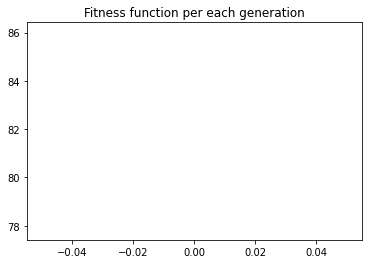

In [ ]:
epochs_num = range(0, 29)
plot.title('Fitness function per each generation')
plot.plot(epochs_num, min_val_loss)

In [ ]:
model = ranked_pop[0][1]
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 18, 50)            10400     
                                                                 
 lstm_31 (LSTM)              (None, 18, 15)            3960      
                                                                 
 lstm_32 (LSTM)              (None, 15)                1860      
                                                                 
 dense_10 (Dense)            (None, 1)                 16        
                                                                 
Total params: 16,236
Trainable params: 16,236
Non-trainable params: 0
_________________________________________________________________


In [ ]:
XTraining, YTraining = createDataset(trainingData, model.input_shape[1])
XValid, YValid = createDataset(validData, model.input_shape[1])
XTraining =XTraining.reshape(XTraining.shape[0],XTraining.shape[1] , 1)
XValid = XValid.reshape(XValid.shape[0],XValid.shape[1] , 1)

In [ ]:
PredictTraining=model.predict(XTraining)
PredictValid=model.predict(XValid)

PredictTraining=scale.inverse_transform(PredictTraining)
PredictValid=scale.inverse_transform(PredictValid)

math.sqrt(mean_squared_error(YTraining,PredictTraining))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


173.18328146798868

In [ ]:
math.sqrt(mean_squared_error(YValid,PredictValid))

267.3370765430131

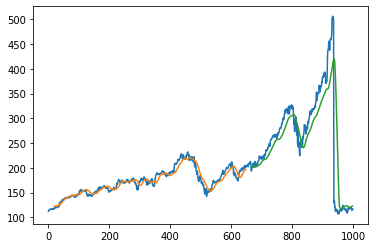

In [ ]:
delay = model.layers[1].output.shape[1]
Plot_training_prediction = numpy.empty_like(database1)
Plot_training_prediction[:, :] = np.nan
Plot_training_prediction[delay:len(PredictTraining)+delay, :] = PredictTraining
# shift test predictions for plotting
Plot_valid_prediction = numpy.empty_like(database1)
Plot_valid_prediction[:, :] = numpy.nan
Plot_valid_prediction[len(PredictTraining)+(delay*2)+1:len(database1)-1, :] = PredictValid
# plot baseline and predictions
plot.plot(scale.inverse_transform(database1))
plot.plot(Plot_training_prediction)
plot.plot(Plot_valid_prediction)
plot.show()

In [ ]:
print(len(validData))
timestep = model.layers[1].output.shape[1]

350


In [ ]:
xInput=validData[len(validData)-timestep:].reshape(1,-1)
xInput.shape

(1, 18)

In [ ]:
tempInput=list(xInput)
tempInput=tempInput[0].tolist()

In [ ]:
print(tempInput)
print(len(tempInput))

[0.009016906700062555, 0.020313087038196564, 0.0305322479649342, 0.02968065122103941, 0.023744520976831496, 0.022867877269880987, 0.03168440826549773, 0.030983093299937314, 0.031108328115216022, 0.03371321227301183, 0.031433938634940484, 0.02802755165936127, 0.02955541640576076, 0.02629931120851592, 0.01755792110206633, 0.02086412022542261, 0.02301815904821536, 0.02442078897933625]
18


In [ ]:
from numpy import array

listOutput=[]
steps=timestep
i=0
while(i<30):
    
    if(len(tempInput)>timestep):
        #print(tempInput)
        xInput=np.array(tempInput[1:])
        print("{} day input {}".format(i,xInput))
        xInput=xInput.reshape(1,-1)
        xInput = xInput.reshape((1, steps, 1))
        #print(xInput)
        Y_hat = model.predict(xInput, verbose=0)
        print("{} day output {}".format(i,Y_hat))
        tempInput.extend(Y_hat[0].tolist())
        tempInput=tempInput[1:]
        #print(tempInput)
        listOutput.extend(Y_hat.tolist())
        i=i+1
    else:
        xInput = xInput.reshape((1, steps,1))
        Y_hat = model.predict(xInput, verbose=0)
        print(Y_hat[0])
        tempInput.extend(Y_hat[0].tolist())
        print(len(tempInput))
        listOutput.extend(Y_hat.tolist())
        i=i+1
    

print(listOutput)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.0409363]
19
1 day input [0.02031309 0.03053225 0.02968065 0.02374452 0.02286788 0.03168441
 0.03098309 0.03110833 0.03371321 0.03143394 0.02802755 0.02955542
 0.02629931 0.01755792 0.02086412 0.02301816 0.02442079 0.0409363 ]
1 day output [[0.04137468]]
2 day input [0.03053225 0.02968065 0.02374452 0.02286788 0.03168441 0.03098309
 0.03110833 0.03371321 0.03143394 0.02802755 0.02955542 0.02629931
 0.01755792 0.02086412 0.02301816 0.02442079 0.0409363  0.04137468]
2 day output [[0.04153284]]
3 day input [0.02968065 0.02374452 0.02286788 0.03168441 0.03098309 0.03110833
 0.03371321 0.03143394 0.02802755 0.02955542 0.02629931 0.01755792
 0.02086412 0.02301816 0.02442079 0.0409363  0.04137468 0.04153284]
3 day output [[0.04155231]]
4 day input [0.02374452 0.02286788 0.03168441 0.03098309 0.03110833 0.03371321
 0.03143394 0.02802755 0.02955542 0.02629931 0.01755792 0.02086412
 0.02301816 0.02442079 0.0409363  0.04137468 0.04153284 0.04155231]
4 day output [[0.04181015]]
5 day input [0.02

In [ ]:
day_new=np.arange(1,31)
day_pred=np.arange(31,61)

In [ ]:
len(database1)

1000

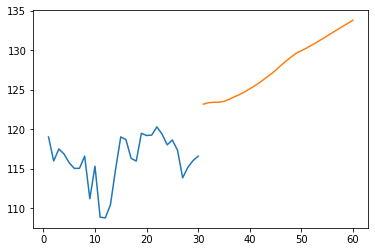

In [ ]:
plot.plot(day_new,scale.inverse_transform(database1[970:]))
plot.plot(day_pred,scale.inverse_transform(listOutput))

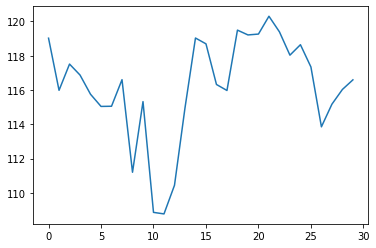

In [ ]:
plot.plot(scale.inverse_transform(database1[970:]))

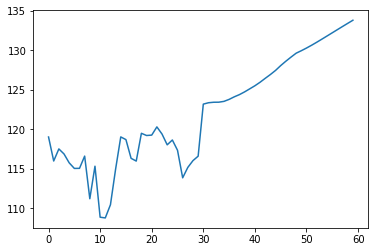

In [ ]:
database3=database1.tolist()
database3.extend(listOutput)
plot.plot(scale.inverse_transform(database3[970:]))

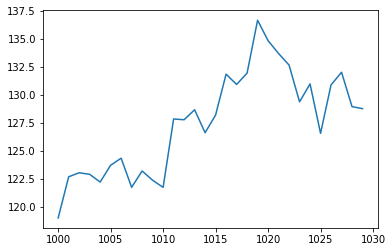

In [ ]:
a =  pds.read_csv('AAPL.csv')
a = a.reset_index()['close']
plot.plot(a[1000:1030])

In [ ]:
math.sqrt(mean_squared_error(scale.inverse_transform(listOutput),a[1000:1030]))

2.841205651816309

In [ ]:
XTraining, YTraining = createDataset(trainingData, model.input_shape[1])
XValid, YValid = createDataset(validData, model.input_shape[1])
XTraining =XTraining.reshape(XTraining.shape[0],XTraining.shape[1] , 1)
XValid = XValid.reshape(XValid.shape[0],XValid.shape[1] , 1)
model.fit(XTraining,YTraining,validation_data=(XValid,YValid),epochs=30,batch_size=64,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/30
10/10 [==============================] - 2s 199ms/step - loss: 4.1327e-04 - val_loss: 0.0197
Epoch 2/30
10/10 [==============================] - 2s 188ms/step - loss: 4.0402e-04 - val_loss: 0.0193
Epoch 3/30
10/10 [==============================] - 2s 160ms/step - loss: 3.9054e-04 - val_loss: 0.0191
Epoch 4/30
10/10 [==============================] - 2s 158ms/step - loss: 3.8997e-04 - val_loss: 0.0188
Epoch 5/30
10/10 [==============================] - 2s 160ms/step - loss: 3.9119e-04 - val_loss: 0.0187
Epoch 6/30
10/10 [==============================] - 2s 157ms/step - loss: 3.8588e-04 - val_loss: 0.0188
Epoch 7/30
10/10 [==============================] - 2s 193ms/step - loss: 3.9118e-04 - val_loss: 0.0185
Epoch 8/30
10/10 [==============================] - 2s 191ms/step - loss: 3.8295e-04 - val_loss: 0.0181
Epoch 9/30
10/10 [==============================] - 2s 190ms/step - loss: 3.7046e-04 - val_loss: 0.0180
Epoch 10/30
10/10 [==============================] - 2s 155ms/st

In [ ]:
model1=Sequential()
model1 = model
model1.set_weights(model.get_weights()) 